# Data-Cleaner

In this section the final data stored in touploud2 table are cleaned and the most important values are visualized (price and mileage of each scraped vehicle)

In [1]:
from random import sample 
import sqlite3 as sql
import pandas as pd


from bs4 import BeautifulSoup
import math
import tqdm
import json
import pandas as pd
import datetime
import time

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from IPython.core.debugger import Tracer
import time
from random import sample 

from statistics import mean 
import matplotlib.pyplot as plt

## Data cleaning

In [2]:
database = 'info13.1.2020.db'
connection = sql.connect(database)

info1 = pd.read_sql_query('''SELECT * from toupload2''', connection)

In [3]:
sep=','
for y in list(range(1,len(info1['transmission']))):
    transmission2=info1['transmission'][y].split(sep, 1)[0]
    fuel2=info1['transmission'][y].split(sep, 1)[1]
    


IndexError: list index out of range

In [4]:
info1['transmission']=transmission2
info1['Ffuel']=fuel2

In [5]:
fs=list(range(0,len(info1['Price'])))

In [6]:
for f in fs:
    info1['Price'][f]=info1['Price'][f][2:-2]
    
for f in fs:
    info1['km'][f]=info1['km'][f][:-2]

for f in fs:
    info1['hp'][f]=info1['hp'][f][:-2]
    
for f in fs:
    info1['kW'][f]=info1['kW'][f][:-2]

for f in fs:
    info1['hp'][f]=info1['hp'][f][:-2]

C:\Users\Radka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Radka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Radka\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Radka\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 


### Price

In [7]:
Price=(info1['Price'].apply(lambda x: x.replace(',',''))).astype(int)

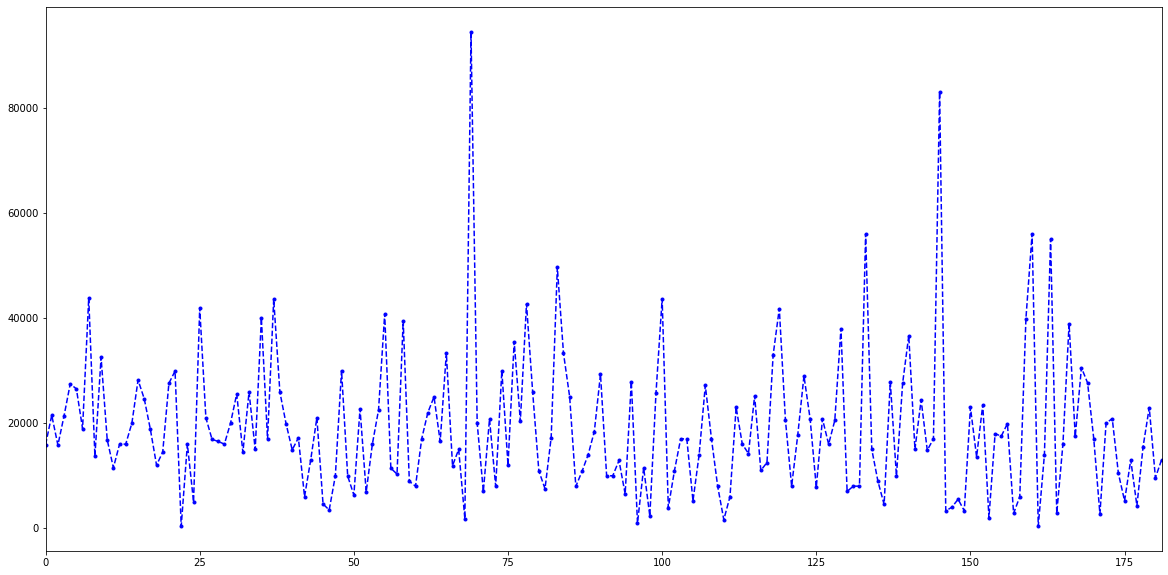

In [8]:
plt.figure(figsize = (20,10))
Price.plot(color='b',marker='.', linestyle='dashed')

In [9]:
meanPrice=mean(Price)
maxPrice=max(Price)
minPrice=min(Price)

Pr = {'meanPrice':meanPrice,
     'maxPrice':maxPrice,
      'minPrice':minPrice,
}  
Pr

{'meanPrice': 19088.80769230769, 'maxPrice': 94450, 'minPrice': 390}

### Mileage

In [10]:
Mileage=(info1['km'].apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('-','0'))).dropna().astype(int)

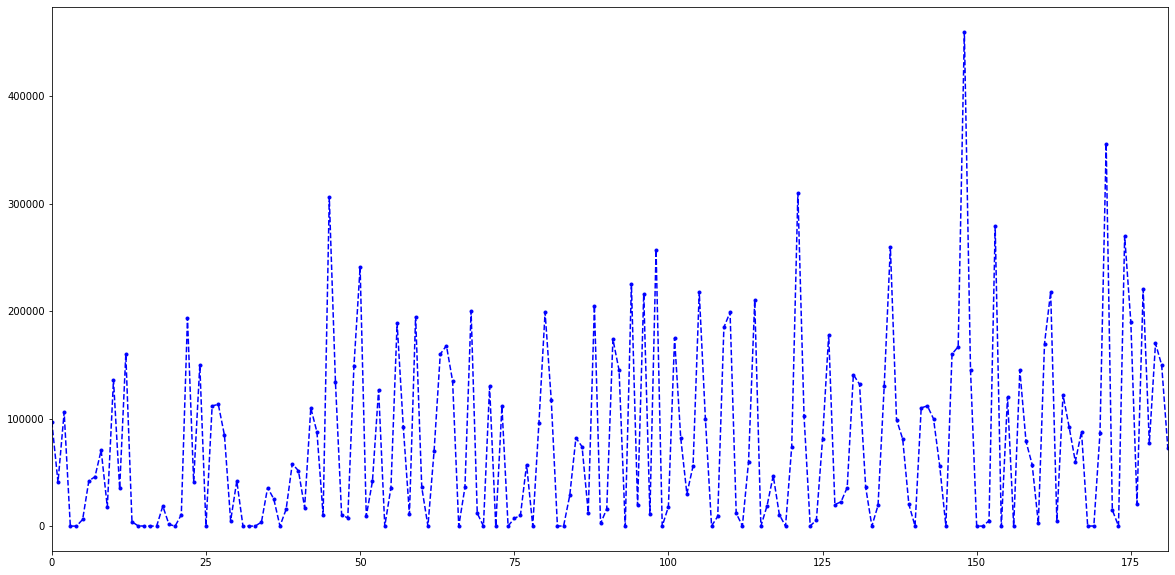

In [11]:
plt.figure(figsize = (20,10))
Mileage.plot(color='b',marker='.', linestyle='dashed')

In [12]:
meanMileage=mean(Mileage)
maxMileage=max(Mileage)
minMileage=min(Mileage)

Ma = {'meanMileage':meanMileage,
     'maxMileage':maxMileage,
      'minMileage':minMileage,
}  
Ma

{'meanMileage': 77323.98351648351, 'maxMileage': 460000, 'minMileage': 0}

Visulialisation of both key vehicles features: Price and Mileage

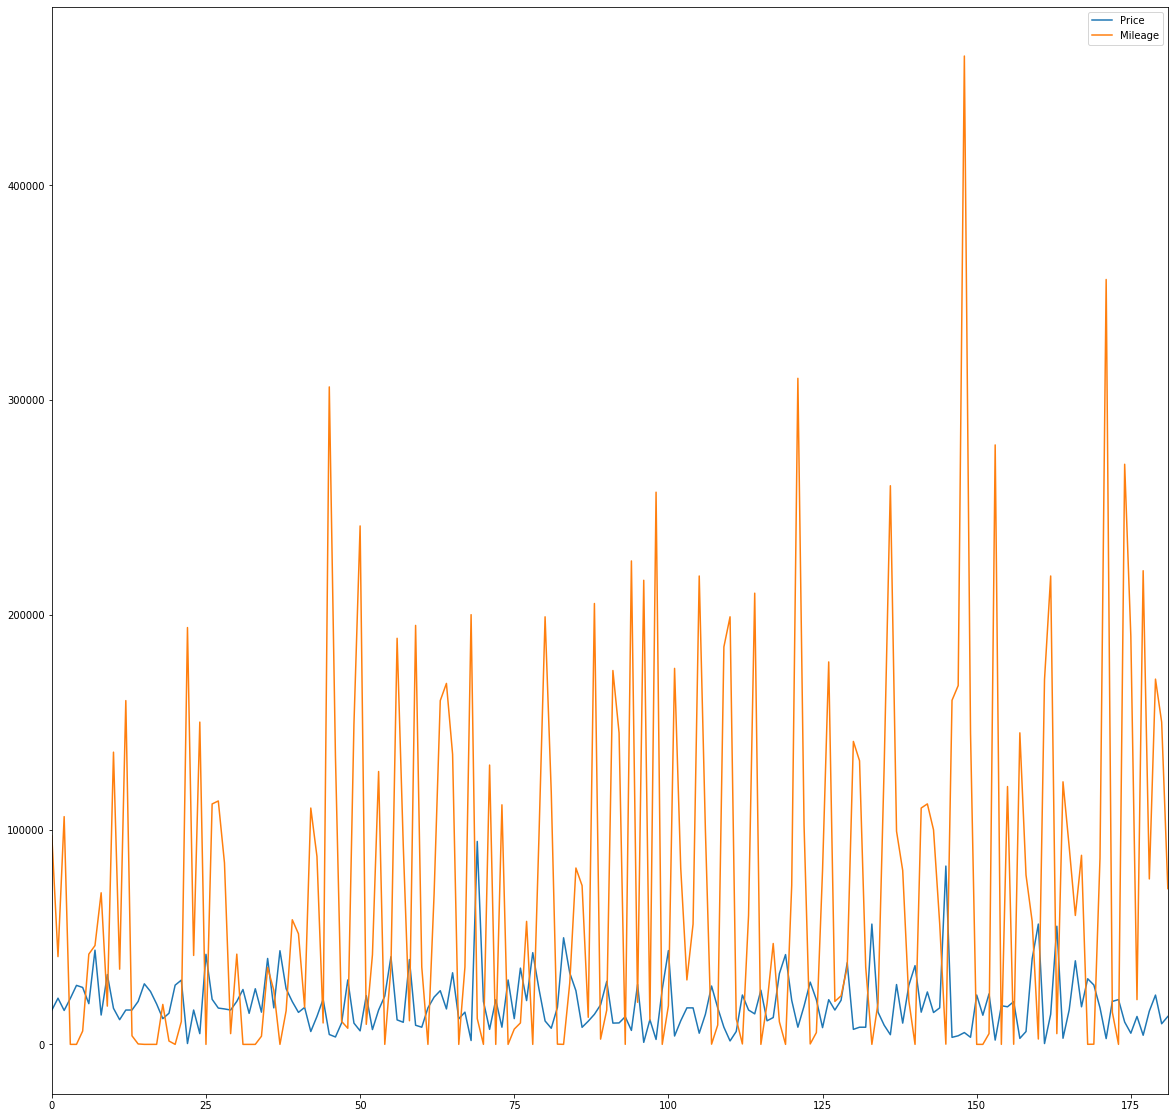

In [13]:
d = {'Price':Price,
     'Mileage':Mileage,
}  

PriceMileage=pd.DataFrame(d)

PriceMileage.plot(figsize=(20,20))